In [113]:
from nmf import *
from utils import *
import numpy as np
from projection import project_onto_Sigma
from data_generation import generate_separable_data

In [ ]:
# Main algorithm: Kernel Separable NMF
# ToDo: integrate in NMF class in nmf.py
def kernel_separable_nmf(K, lambda_param=1.0, max_iter=100, r=3, verbose=False):
    """
    Kernel Separable NMF algorithm.
    
    Parameters:
        M           : Input matrix (here, the simulated feature matrix).
        K           : Kernel matrix (typically M^T M).
        lambda_param: Regularization parameter.
        max_iter    : Number of iterations.
        r           : Number of columns (indices) to select (expected anchors).
        verbose     : If True, prints progress.
        
    Returns:
        X       : The final matrix X after updates.
        indices : The indices corresponding to the r largest diagonal entries of X.
    """
    n = K.shape[0]
    X = np.random.rand(n, n)
    I = np.eye(n)
    epsilon = 1e-10
    for it in range(max_iter):
        KX = K @ X
        denom = 2 * lambda_param * KX + epsilon
        numerator = 2 * lambda_param * K - I
        update_factor = numerator / denom
        X = X * update_factor
        X = project_onto_Sigma(X)
        if verbose and (it % 10 == 0 or it == max_iter - 1):
            diag_norm = np.linalg.norm(np.diag(X))
            print("Iteration {}: ||diag(X)|| = {:.4f}".format(it, diag_norm))
    diag_X = np.diag(X)
    indices = np.argsort(diag_X)[-r:][::-1]
    return X, indices

# ----- Example of usage -----
lambda_param = 50 # Higher value for lower sparsity on the diagonal of X
max_iter = 1000
n_anchors = 3

M, anchors_orig, H = generate_separable_data(n_anchors=n_anchors, n_samples=100, dimension=70, seed=2, kernel=None, sparsity_on_H=0)
K = np.dot(M.T, M)

X_kernel, selected_indices = kernel_separable_nmf(K, lambda_param, max_iter, n_anchors, verbose=True)

# ----- Print results -----
print("\nKernel matrix K:")
print(K)
print("\nFinal X matrix from Kernel Separable NMF:")
print(X_kernel)
print("\nIndices selected for factorization (should include the anchors):")
print(selected_indices)

Iteration 0: ||diag(X)|| = 0.0956
Iteration 10: ||diag(X)|| = 0.2801
Iteration 20: ||diag(X)|| = 0.4788
Iteration 30: ||diag(X)|| = 0.7088
Iteration 40: ||diag(X)|| = 0.9020
Iteration 50: ||diag(X)|| = 1.0437
Iteration 60: ||diag(X)|| = 1.1464
Iteration 70: ||diag(X)|| = 1.2230
Iteration 80: ||diag(X)|| = 1.2820
Iteration 90: ||diag(X)|| = 1.3289
Iteration 100: ||diag(X)|| = 1.3670
Iteration 110: ||diag(X)|| = 1.3987
Iteration 120: ||diag(X)|| = 1.4256
Iteration 130: ||diag(X)|| = 1.4486
Iteration 140: ||diag(X)|| = 1.4686
Iteration 150: ||diag(X)|| = 1.4861
Iteration 160: ||diag(X)|| = 1.5017
Iteration 170: ||diag(X)|| = 1.5155
Iteration 180: ||diag(X)|| = 1.5279
Iteration 190: ||diag(X)|| = 1.5391
Iteration 200: ||diag(X)|| = 1.5493
Iteration 210: ||diag(X)|| = 1.5586
Iteration 220: ||diag(X)|| = 1.5671
Iteration 230: ||diag(X)|| = 1.5749
Iteration 240: ||diag(X)|| = 1.5822
Iteration 250: ||diag(X)|| = 1.5888
Iteration 260: ||diag(X)|| = 1.5950
Iteration 270: ||diag(X)|| = 1.6008
Ite

The algorithm selects the right anchors, so it works for the linear kernel

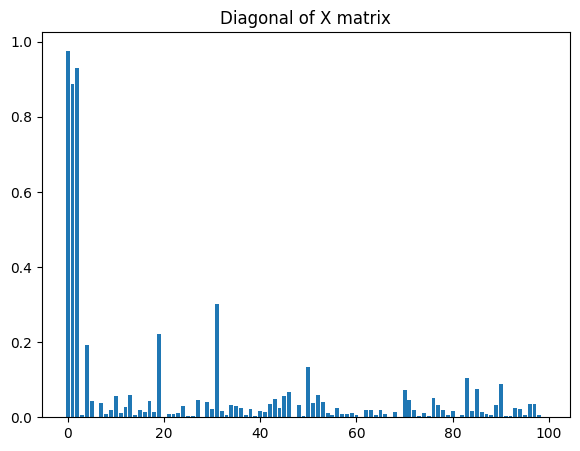

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
# bar plot of the diagonal of X
plt.subplot(1, 2, 1)
plt.bar(range(len(X_kernel)), np.diag(X_kernel))
plt.title("Diagonal of X matrix")
plt.sub
plt.show()

Here we would expect high values in correspondence of the anchors amd zeroes elsewhere.
Since we have 3 anchors in the position 0,1,2, it works